In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

# 1. 데이터 전처리 및 분석

#### 데이터 불러오기 및 분석하기

In [2]:
DATA_IN_PATH='./data/' # 데이터셋 파일이 저장된 위치
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file: # txt가 포함된 파일(.txt 파일) 이름 및 크기 출력
        print(file.ljust(30)
              +str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))
              +"MB")

파일 크기 : 
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


In [3]:
train_data=pd.read_csv(DATA_IN_PATH+'ratings_train.txt', 
                       header=0, delimiter='\t',quoting=3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 150000


In [5]:
# 각 데이터의 리뷰 길이 확인
train_length=train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

<ipython-input-6-69fd8824a1fe>:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

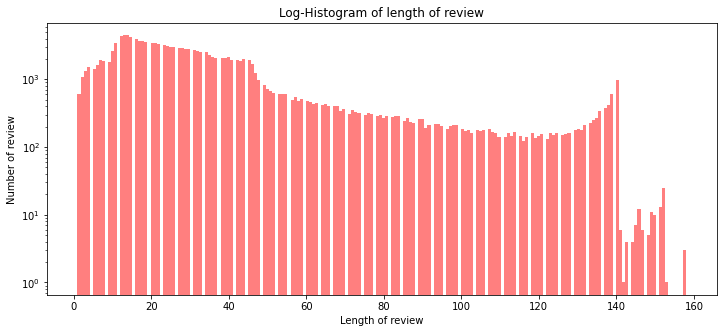

In [6]:
# 전체 데이터의 리뷰 길이 히스토그램 그리기

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))

# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

# 그래프 제목
plt.title('Log-Histogram of length of review')

# 그래프 x축 라벨
plt.xlabel('Length of review')

# 그래프 y축 라벨
plt.ylabel('Number of review')

In [7]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

# 사분위에 대한 경우 0~100 스케일로 되어 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fac70372d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac7037e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac703729d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fac7037eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fac703871f0>],
 'means': [<matplotlib.lines.Line2D at 0x7fac7037ee50>]}

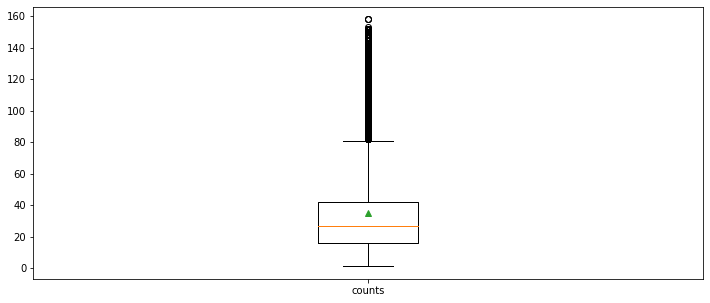

In [8]:
plt.figure(figsize=(12,5))

# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# shomeans : 평균값을 마크함
plt.boxplot(train_length,
           labels=['counts'],
           showmeans=True)

In [9]:
train_review = [review for review in train_data['document'] if type(review) is str]
train_review[0:3]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다']

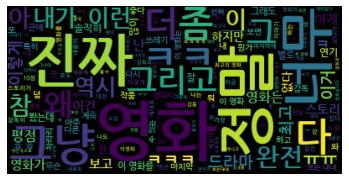

In [10]:
wordcloud=WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/Users/hyeseon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

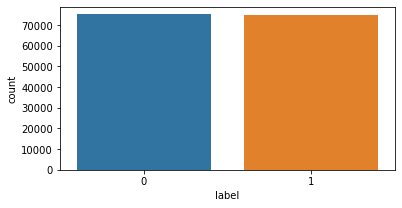

In [11]:
fig, zxe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [12]:
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


<ipython-input-13-73b2e8e3f758>:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

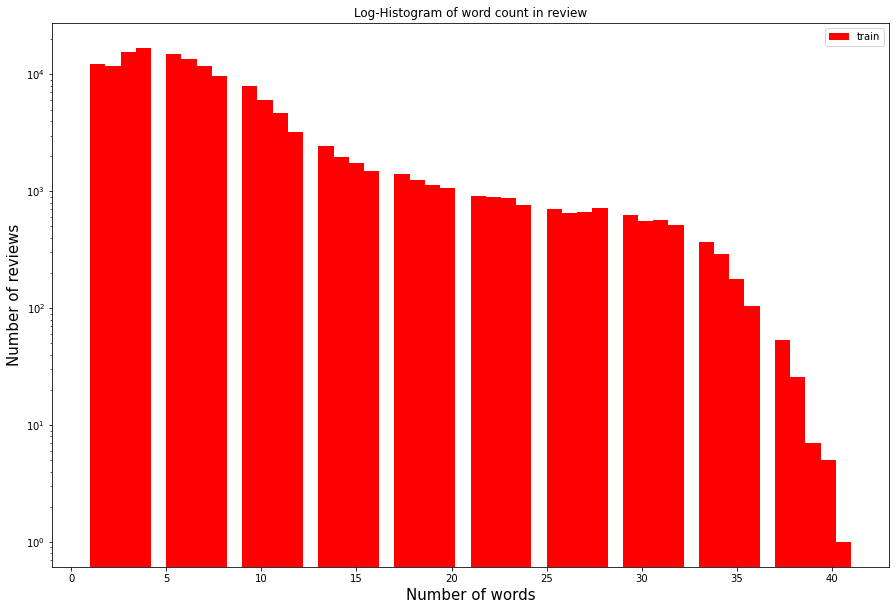

In [13]:
train_word_counts = train_data['document'].astype(str) \
                    .apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [14]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

# 사분위에 대한 경우 0~100 스케일로 되어 있음
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


In [15]:
qmarks = np.mean(train_data['document'].astype(str) \
                .apply(lambda x: '?' in x)) # 문장이 물음표로 끝나는 경우

fullstop = np.mean(train_data['document'].astype(str) \
                .apply(lambda x: '.' in x)) # 문장이 마침표로 끝나는 경우

print('물음표로 끝나는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표로 끝나는 질문: {:.2f}%'.format(fullstop*100))

물음표로 끝나는 질문: 8.25%
마침표로 끝나는 질문: 51.76%


#### 데이터 전처리

In [16]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt

In [17]:
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [18]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ \\s]","", train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [19]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [20]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

In [21]:
def preprocessing(review, okt, remove_stopwords=False, stop_words=[]):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt: okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 여부 선택. 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야 함. 기본값은 빈 리스트
    
    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","", review)
    
    # 2. okt 객체를 활용해 형태소 단위로 나누기(토크나이징)
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    
    return word_review

In [22]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
okt = Okt()
clean_train_review_okt = []

for review in train_data['document']:
    # 비어 있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review_okt.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_train_review_okt.append([]) # string이 아니면 비어있는 값 추가
        

clean_train_review_okt[:4] # 앞에 4개 데이터 확인

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [23]:
# stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
# okt = Okt()

test_data = pd.read_csv(DATA_IN_PATH+'ratings_test.txt', header=0, delimiter='\t',
                       quoting=3)
clean_test_review_okt = []

for review in test_data['document']:
    # 비어 있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review_okt.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_review_okt.append([]) # string이 아니면 비어있는 값 추가
        
clean_test_review_okt[:4] # 앞에 4개 데이터 확인

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [24]:
from konlpy.tag import Mecab
mecab = Mecab()
def preprocessing_mecab(review, okt, remove_stopwords=False, stop_words=[]):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt: okt 객체를 반복적으로 생성하지 않고 미리 생성한 후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 여부 선택. 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야 함. 기본값은 빈 리스트
    
    # 1. 한글 및 공백을 제외한 문자를 모두 제거
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]","", review)
    
    # 2. okt 객체를 활용해 형태소 단위로 나누기(토크나이징)
#     word_review = okt.morphs(review_text, stem=True)
    word_review = okt.morphs(review_text)
    
    
    if remove_stopwords:
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    
    return word_review

In [25]:
[
    Okt().morphs("아름답다", stem=True),
    Okt().morphs("아름다워", stem=True),
    Okt().morphs("아름답구나", stem=True)
]

[['아름답다'], ['아름답다'], ['아름답다']]

In [26]:
[
    Mecab().morphs("아름답다"),
    Mecab().morphs("아름다워"),
    Mecab().morphs("아름답구나")
]

[['아름답', '다'], ['아름다워'], ['아름답', '구나']]

In [27]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
# okt = Okt()
okt = mecab
clean_train_review = []

for review in train_data['document']:
    # 비어 있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing_mecab(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_train_review.append([]) # string이 아니면 비어있는 값 추가
        

clean_train_review[:4] # 앞에 4개 데이터 확인

[['더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '없', '다', '평점', '조정']]

In [28]:
# stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의', '있', '되', '수', '보', '주', '등', '한']
# okt = Okt()

test_data = pd.read_csv(DATA_IN_PATH+'ratings_test.txt', header=0, delimiter='\t',
                       quoting=3)
clean_test_review = []

for review in test_data['document']:
    # 비어 있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing_mecab(review, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_review.append([]) # string이 아니면 비어있는 값 추가
        
clean_test_review[:4] # 앞에 4개 데이터 확인

[['굳', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘', '진', '않', '지만', '점', '짜리', '더더욱', '아니', '잖아'],
 ['지루', '지', '않', '은데', '완전', '막장', '임', '돈', '고', '기', '에']]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_testx(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태

MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

# 학습데이터를 벡터화
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

# 평가 데이터를 벡터화
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_labels = np.array(test_data['label']) # 평가 데이터의 라벨


In [ ]:
DEFAULT_PATH = './'
DATA_IN_PATH='./data/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1 # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(DEFAULT_PATH+DATA_IN_PATH):
    os.makedirs(DEFAULT_PATH+DATA_IN_PATH)
    
# 전처리된 학습 데이터를 넘파이 형태로 저장
np.save(open(DEFAULT_PATH+DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DEFAULT_PATH+DATA_IN_PATH + TRAIN_LABEL_DATA,'wb'), train_labels)

# 전처리된 평가 데이터를 넘파이 형태로 저장
np.save(open(DEFAULT_PATH+DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DEFAULT_PATH+DATA_IN_PATH + TEST_LABEL_DATA,'wb'), test_labels)

# 데이터 사전을  json형태로 저장
json.dump(data_configs, open(DEFAULT_PATH+DATA_IN_PATH+DATA_CONFIGS, 'w'),
         ensure_ascii=False)

# 2. 모델링

#### 학습 데이터 불러오기

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

from tqdm import tqdm

In [ ]:
DATA_IN_PATH='./data/'
DATA_OUT_PATH='./output/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH+LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH+DATA_CONFIGS, 'r'))

#### 파라미터 정의

In [ ]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs = {'model_name': model_name,
         'vocab_size': prepro_configs['vocab_size'],
         'embedding_size' : 128,
         'num_filters' : 100,
         'dropout_rate' : 0.5,
         'hidden_dimension': 250,
         'output_dimension':1
        }

#### 모델 구현

In [ ]:
class CNNCLASSIFIER(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                         output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters = kargs['num_filters'],
                                       kernel_size = kernel_size,
                                       padding='valid',
                                       activation=tf.keras.activations.relu,
                                       
                                       kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3.)) \
                          for kernel_size in [3,4,5]]
        
        self.dropout = layers.Dropout(kargs['droupout_rate'])
        self.fc1 = layers.Dense(units = kargs['hidden_dimension'],
                               activation = tf.keras.activations.relu,
                               kernel_constraint = tf.keras.constrains.MaxNorm(max_value=3.))
        self.fc2 = layers.dense(units = kargs['output_dimension'],
                               activation=tf.keras.activations.sigmoid,
                               kernel_constraint = tf.keras.constrains.MaxNorm(max_value=3.))
        
        def call(self, x):
            x = self.embedding(x)
            x = self.dropout(x)
            x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
            x = self.fc1(x)
            x = self.fc2(x)
            
            return x

#### 모델 학습

In [ ]:
model = CNNClassifier(**kargs)

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
earlystop_callback = EarlyStopping(monitor('val_accuracy', min_delta=0.0001, patience = 2))

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} - Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} - Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(checkpoint_path, monitor = 'var_accuracy', 
                              verbose=1, save_best_only=True,
                              save_weights_only=True)

history = model.fit(train_input, train_label, batch_ssize=BATCH_SIZE, epochs = NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks = [earlystop_callback, cp_callback])

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
plot_graphs(history, 'accuracy')

#### 모델 테스트(평가)

In [ ]:
DATA_OUT_PATH='./output/'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen = test_input.shape[1])
test_label_data = np.load(open(DATA_IN_PATH+LABEL_TEST_DATA, 'rb'))

In [ ]:
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))
model.evaluate(test_input, test_label_data)